<a href="https://colab.research.google.com/github/FaldoFajri/padang_food_image_classification/blob/main/exploratory_data_analysis_for_image_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis for Image Dataset Padang Cuisine

What is Exploratory Data Analysis?

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations. Therefore, before doing machine learning modeling, we should do EDA on the dataset, so that we know more deeply about the Padang cuisine image dataset.

Import Dataset

**In order to make EDA work easier, we should convert the image dataset into a dataframe**

Reference : https://stackoverflow.com/questions/71009215/how-to-make-a-dataframe-from-images-python-pandas

In [7]:
#steps to convert image dataset to dataframe
#can use pathlib to search for files
#Here's an example of how to recursively search the current directory for files
#Then, you just need to reformat that into a dataframe. Here's how to do that

import pandas as pd
from pathlib import Path

data = '/content/padangfood/dataset_padang_food'

paths = [path.parts[-2:] for path in
         Path(data).rglob('*.*')]                             #writing purpose ('*.*') so that all image formats can be retrieved
df = pd.DataFrame(data=paths, columns=['Class','Images'])     #create column names for dataframe
df = df.sort_values('Class',ascending=True)                   #sort class name
df.reset_index(drop=True, inplace=True)                       #sort index of each row
df                                                            #display dataframe

,Class,Images
0,ayam_goreng,ayam_goreng (35).jpg
1,ayam_goreng,ayam_goreng (89).jpg
2,ayam_goreng,ayam_goreng (102).jpg
3,ayam_goreng,ayam_goreng (67).jpg
4,ayam_goreng,ayam_goreng (13).jpg
...,...,...
988,telur_dadar,telur_dadar (105).jpg
989,telur_dadar,telur_dadar (26).jpg
990,telur_dadar,telur_dadar (122).jpg
991,telur_dadar,telur_dadar (20).jpg


**Counting the number of Padang cuisine image datasets**

In [8]:
print('Count the number of image datasets')
print("Image Count : {}".format(len(df.Images)))
print("Class Count : {} \n".format(len(df['Class'].value_counts())))
print('Count the number of images in each class')
print(df['Class'].value_counts())

Count the number of image datasets
Image Count : 993
Class Count : 9 

Count the number of images in each class
gulai_tunjang      119
telur_dadar        116
ayam_pop           113
gulai_ikan         111
telur_balado       111
dendeng_batokok    109
ayam_goreng        107
daging_rendang     104
gulai_tambusu      103
Name: Class, dtype: int64


It can be seen that this dataset has 9 image classes with a total of 993 images.

# Identify the count of each class using a visualization

Identifying class imbalance is an easy first step. We’re going to find the number of images assigned to each class and plot them in a bar chart to easily identify any imbalance. Imbalance in a CNN could result in poor performance for the class with less representation, impacting overall performance.

Text(0, 0.5, 'Count Image')

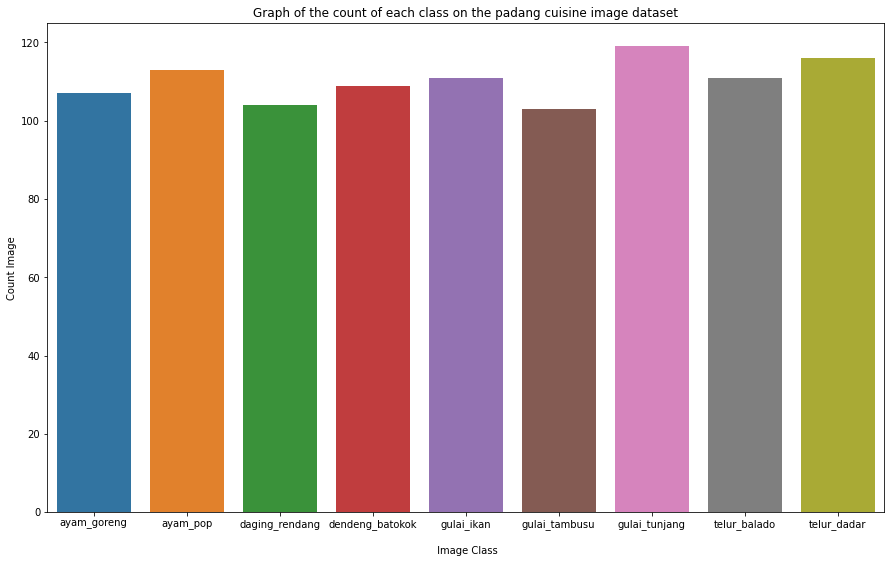

In [9]:
import seaborn as sns
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(15,9))
sns.countplot(data=df, x='Class')
plt.title('Graph of the count of each class on the padang cuisine image dataset')
plt.xlabel('\n Image Class')
plt.ylabel('Count Image')

After looking at the number of classes with a histogram graphic display, it can be seen that the number in each class has a different number of images, but the number is not very similar to that of other classes. therefore using bar chart visualization can identify class imbalances quickly.

In [10]:
Class_Id_Dist_Total = df['Class'].value_counts(sort=False)

import plotly.express as px
fig=px.pie(Class_Id_Dist_Total,values= 'Class', names=df['Class'].unique(),hole=0.500)
fig.update_layout(title='Data Distribution of Padang Cuisine Image Dataset',font_size=15,title_x=0.45,annotations=[dict(text='Padang Cuisine Image Dataset',font_size=12, showarrow=False,height=1000,width=1000)])
fig.update_traces(textfont_size=15,textinfo='percent')
fig.show()

After visualizing the dataset using a pie chart, it can be seen that the *gulai_tunjang* class has the highest data distribution and the *rendang_daging* class has the least distribution of data.

In [16]:
directories = {'Ayam Goreng': '/content/padangfood/dataset_padang_food/ayam_goreng/',
               'Ayam Pop': '/content/padangfood/dataset_padang_food/ayam_pop/',
               'Daging Rendang': '/content/padangfood/dataset_padang_food/daging_rendang/',
               'Dendeng Batokok': '/content/padangfood/dataset_padang_food/dendeng_batokok/',
               'Gulai Ikan': '/content/padangfood/dataset_padang_food/gulai_ikan/',
               'Gulai Tambusu':'/content/padangfood/dataset_padang_food/gulai_tambusu/',
               'Gulai Tunjang':'/content/padangfood/dataset_padang_food/gulai_tunjang/',
               'Telur Balado':'/content/padangfood/dataset_padang_food/telur_balado/',
               'Telur Dadar':'/content/padangfood/dataset_padang_food/telur_dadar/'}

def get_dims(file):
  im = Image.open(file)
  arr = np.array(im)
  h,w,d = arr.shape
  return h,w

**Plotting Image Size**

Consistent image size is crucial for deep learning, mismatched matrices will bring your project to a quick stop. Visualizing raw image size can also help you understand your dataset better. We can find out the different sizes of images from each class.

[########################################] | 100% Completed |  1.8s
[########################################] | 100% Completed |  1.5s
[########################################] | 100% Completed |  2.0s
[########################################] | 100% Completed |  2.1s
[########################################] | 100% Completed |  1.7s
[########################################] | 100% Completed |  1.6s
[########################################] | 100% Completed |  1.7s
[########################################] | 100% Completed |  1.9s
[########################################] | 100% Completed |  2.3s


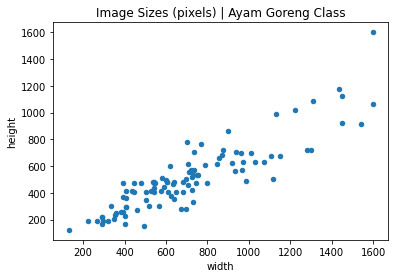

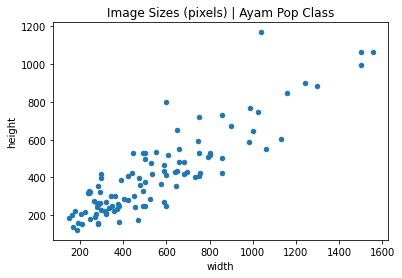

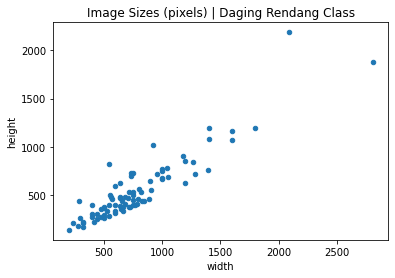

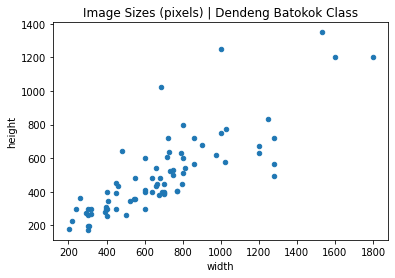

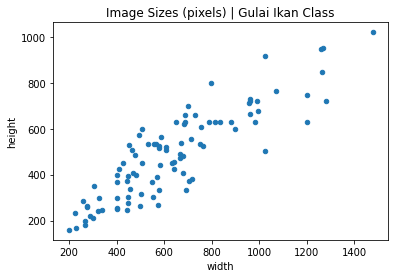

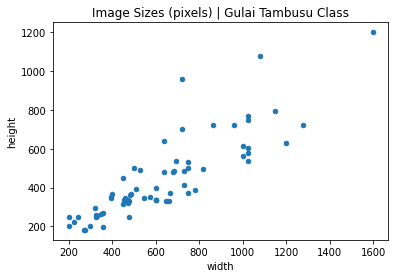

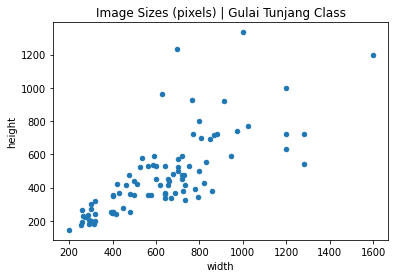

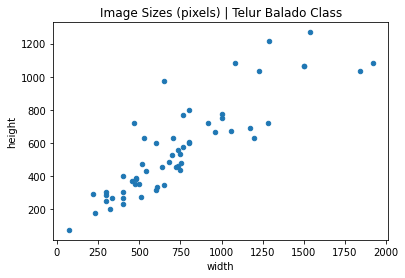

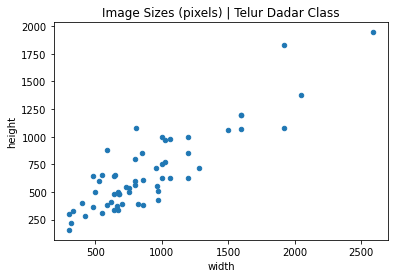

In [20]:
import os
import dask.bag as db
import dask.array as da
from dask.diagnostics import ProgressBar
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



for n,d in directories.items():
  filepath = d
  filelist = [filepath + f for f in os.listdir(filepath)]
  dims = db.from_sequence(filelist).map(get_dims)
    
  with ProgressBar():
    dims = dims.compute()
    dim_df = pd.DataFrame(dims, columns=['height', 'width'])
    sizes = dim_df.groupby(['height', 'width']).size().reset_index().rename(columns={0:'count'})
    sizes.plot.scatter(x='width', y='height');
    plt.title('Image Sizes (pixels) | {} Class'.format(n))